In [2]:
import yt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
plt.style.use('default')

In [3]:
num = 300

In [4]:
ds = yt.load('/data/yhgong/galaxy_cluster_merger/mass_scalar/perseus_merger_hdf5_plt_cnt_%04d'%num)

yt : [INFO     ] 2022-12-21 13:51:13,906 Parameters: current_time              = 3.78726832370333e+16
yt : [INFO     ] 2022-12-21 13:51:13,909 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-12-21 13:51:13,925 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2022-12-21 13:51:13,928 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2022-12-21 13:51:13,930 Parameters: cosmological_simulation   = 0


In [9]:
ds_old = yt.load('/data/yhgong/galaxy_cluster_merger/refine150_150kpc_gas2/perseus_merger_hdf5_plt_cnt_%04d'%num)

yt : [INFO     ] 2022-12-20 23:07:35,821 Parameters: current_time              = 2.6825364563340376e+16
yt : [INFO     ] 2022-12-20 23:07:35,823 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-12-20 23:07:35,825 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2022-12-20 23:07:35,827 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2022-12-20 23:07:35,828 Parameters: cosmological_simulation   = 0


### Mass scalar

yt : [INFO     ] 2022-12-20 16:02:43,089 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:43,090 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:43,092 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:43,093 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:43,095 Making a fixed resolution buffer of (('flash', 'sub2')) 800 by 800
yt : [WARNING  ] 2022-12-20 16:02:43,365 Plotting ('flash', 'sub2'): Both positive and negative values. Min = 0.0 dimensionless, Max = 1.0000000000000742 dimensionless.
yt : [WARNING  ] 2022-12-20 16:02:43,367 Switching to symlog colorbar scaling.



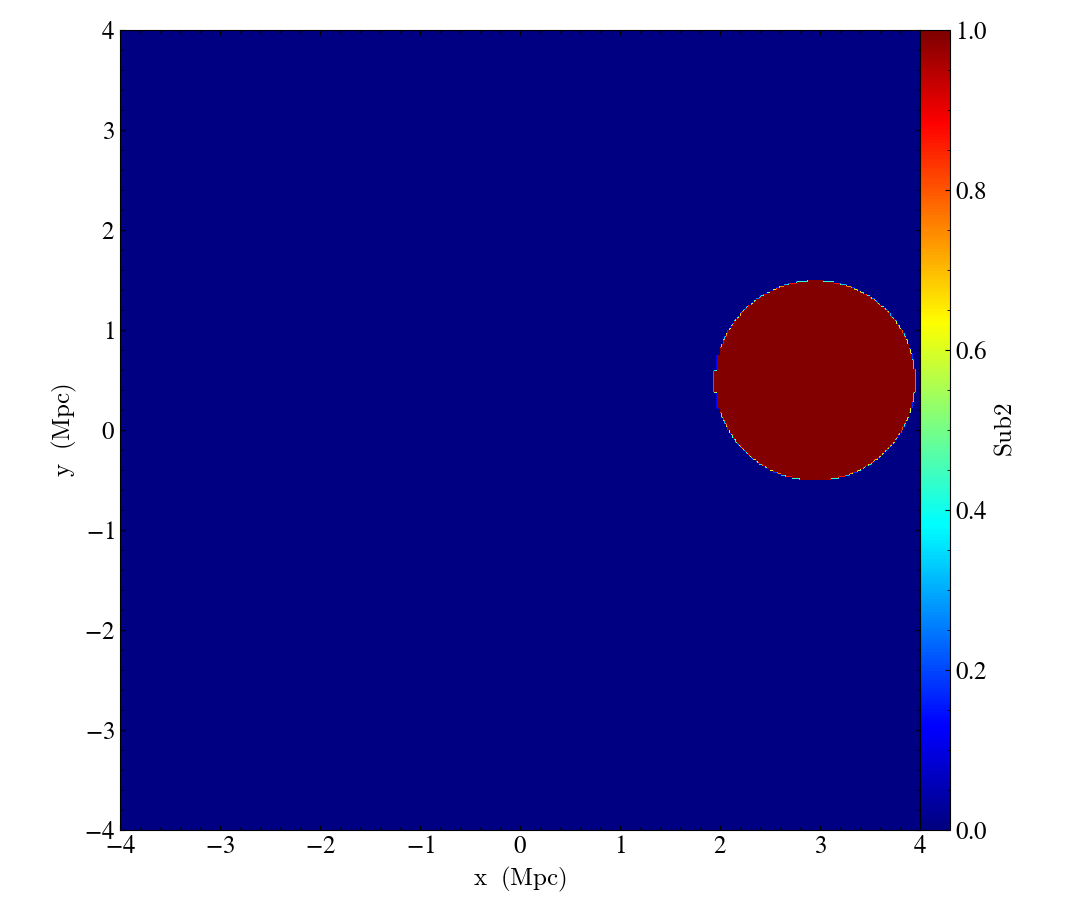

In [6]:
# 180
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','sub2')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'sub2')], 'Blue-Red')
p.set_zlim(('flash', 'sub2'), 0, 1)
p.set_log(('flash', 'sub2'), False)
p.show()

yt : [INFO     ] 2022-12-21 13:51:31,248 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:51:31,252 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:51:31,256 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:51:31,257 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:51:31,262 Making a fixed resolution buffer of (('flash', 'sub2')) 800 by 800
yt : [WARNING  ] 2022-12-21 13:51:31,625 Plotting ('flash', 'sub2'): Both positive and negative values. Min = -7.704274497127445e-38 dimensionless, Max = 1.000000119209294 dimensionless.
yt : [WARNING  ] 2022-12-21 13:51:31,627 Switching to symlog colorbar scaling.



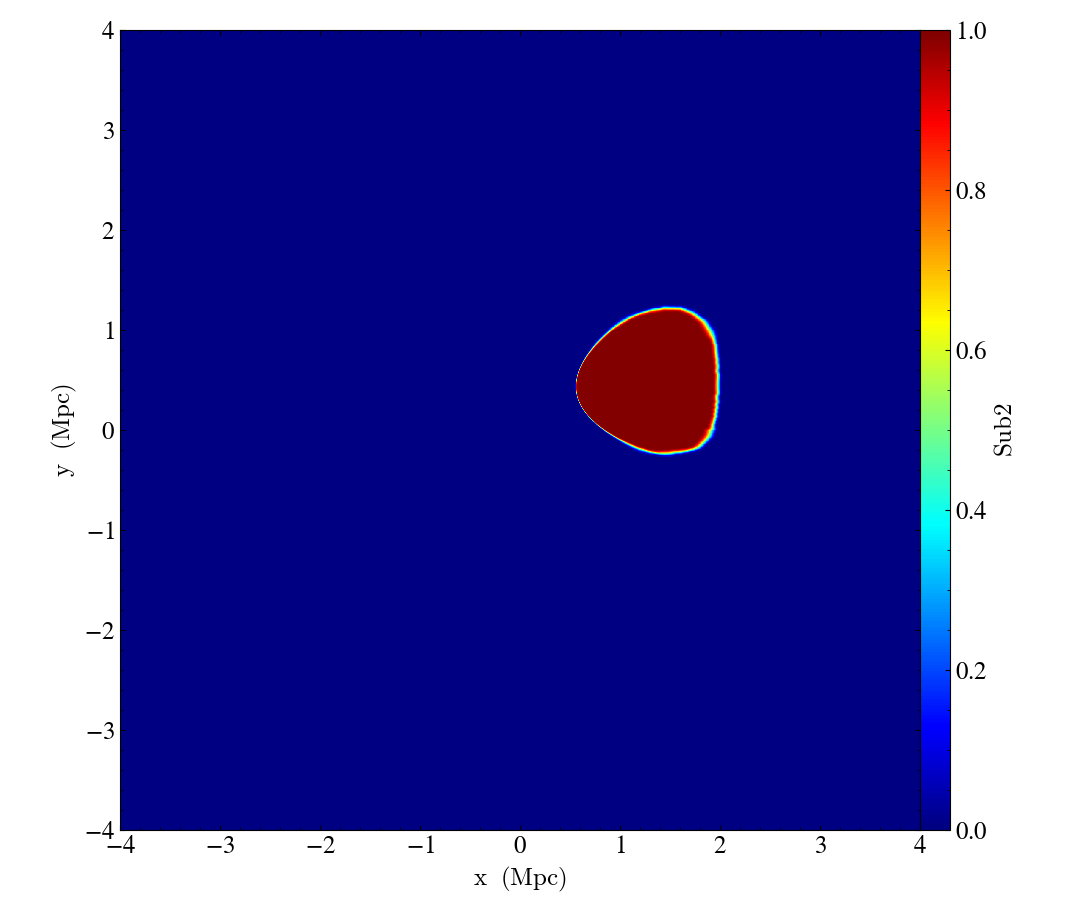

In [5]:
# 300
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','sub2')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'sub2')], 'Blue-Red')
p.set_zlim(('flash', 'sub2'), 0, 1)
p.set_log(('flash', 'sub2'), False)
p.show()

### Temperature

yt : [INFO     ] 2022-12-20 16:02:49,208 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:49,210 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:49,212 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:49,213 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:02:49,216 Making a fixed resolution buffer of (('flash', 'temp')) 800 by 800



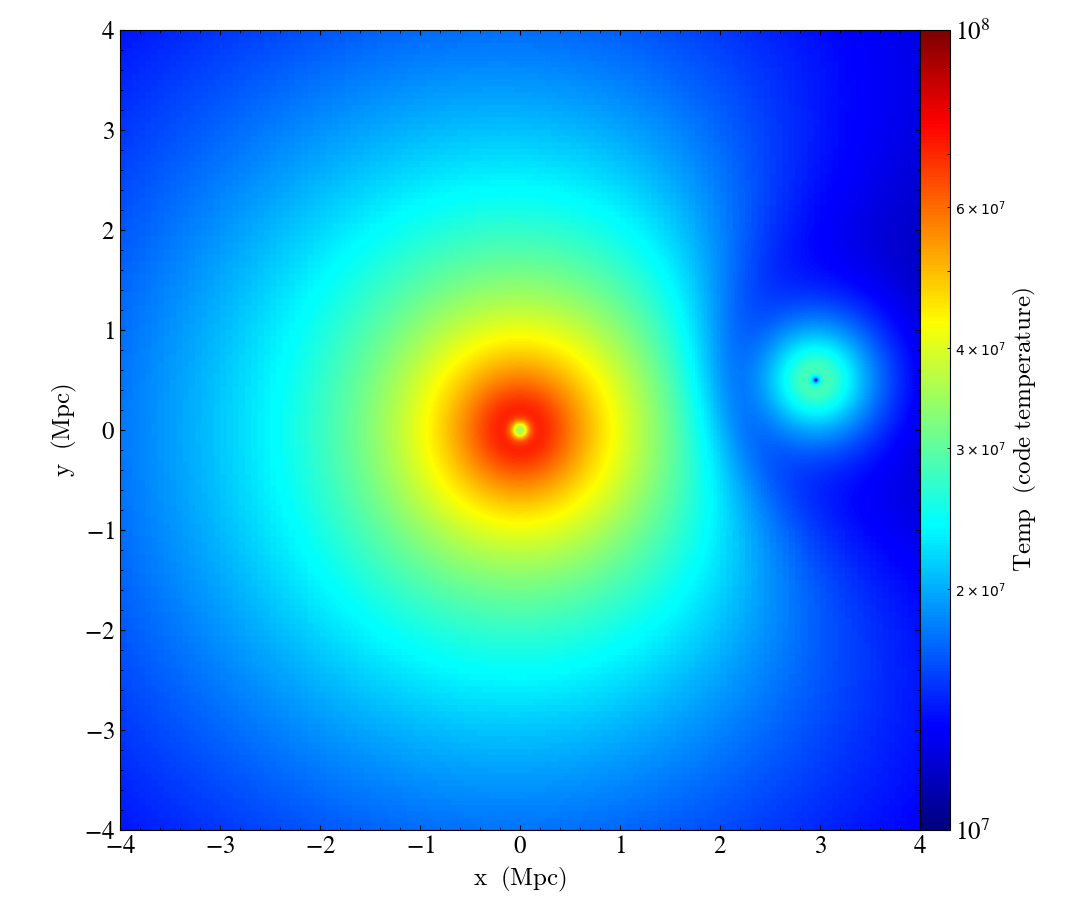

In [7]:
# 180
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','temp')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'temp')], 'Blue-Red')
p.set_zlim(('flash', 'temp'), 1e7, 1e8)
# p.set_log(('flash', 'temp'), False)
p.show()

yt : [INFO     ] 2022-12-21 13:59:26,531 xlim = -7714193952405812034928640.000000 7714193952405812034928640.000000
yt : [INFO     ] 2022-12-21 13:59:26,532 ylim = -7714193952405812034928640.000000 7714193952405812034928640.000000
yt : [INFO     ] 2022-12-21 13:59:26,534 xlim = -7714193952405812034928640.000000 7714193952405812034928640.000000
yt : [INFO     ] 2022-12-21 13:59:26,536 ylim = -7714193952405812034928640.000000 7714193952405812034928640.000000
yt : [INFO     ] 2022-12-21 13:59:26,539 Making a fixed resolution buffer of (('flash', 'temp')) 800 by 800



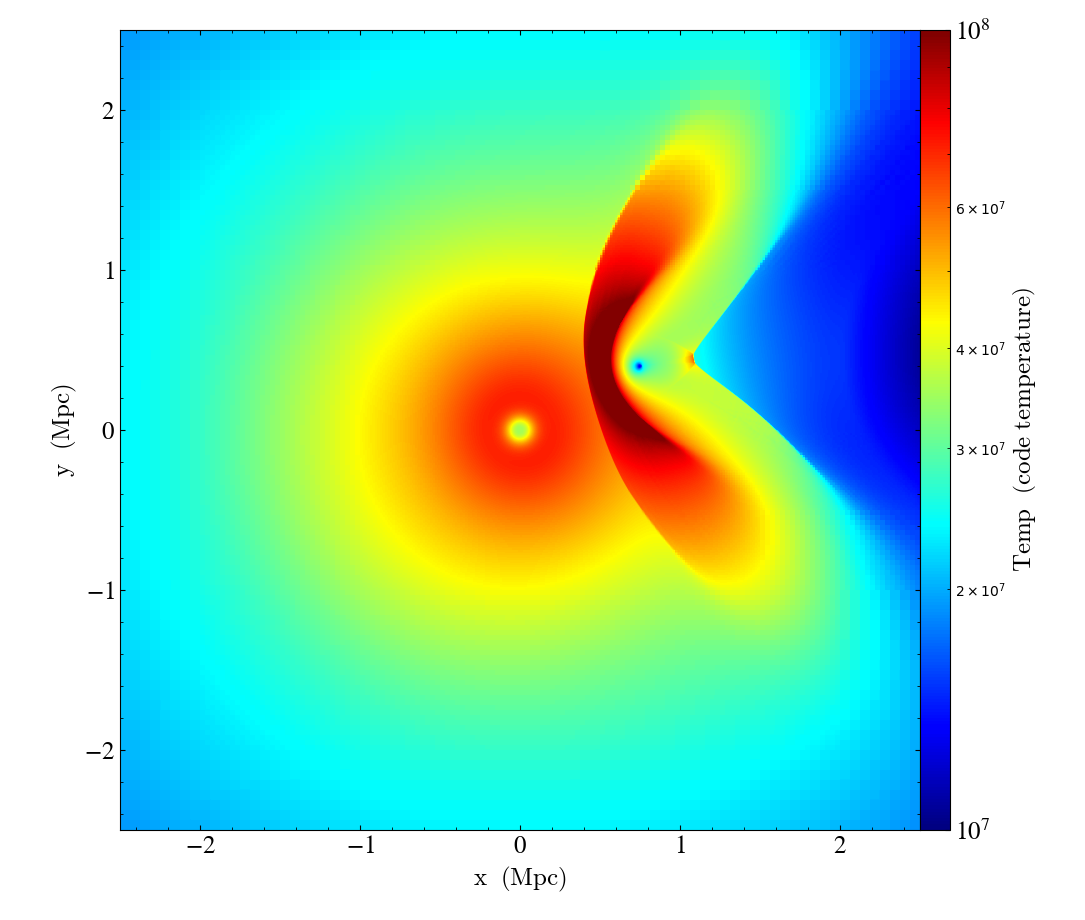

In [13]:
# 300
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','temp')],
    width = (5, 'Mpc')
)
p.set_cmap([('flash', 'temp')], 'Blue-Red')
p.set_zlim(('flash', 'temp'), 1e7, 1e8)
# p.set_log(('flash', 'temp'), False)
p.show()

yt : [INFO     ] 2022-12-20 23:07:50,418 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 23:07:50,420 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 23:07:50,422 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 23:07:50,423 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 23:07:50,426 Making a fixed resolution buffer of (('flash', 'temp')) 800 by 800



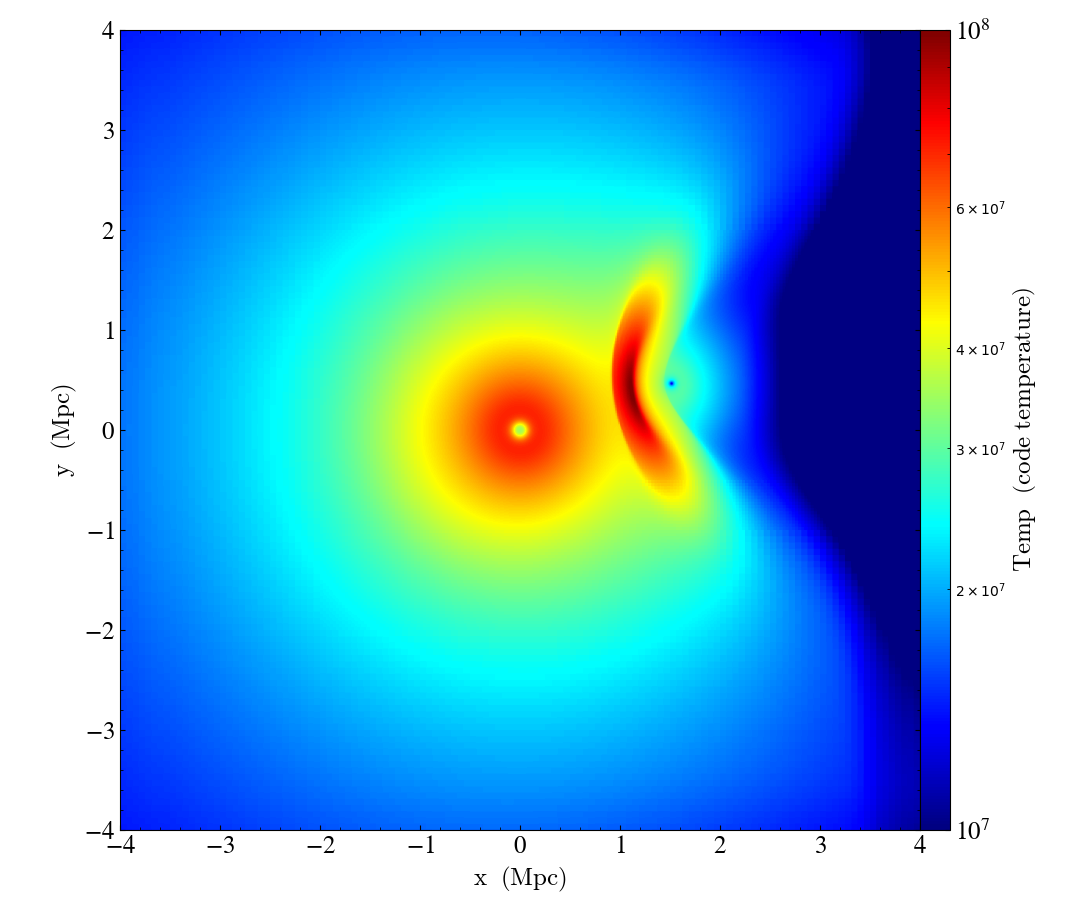

In [10]:
# 265_old
p = yt.SlicePlot(
    ds_old, 
    'z', 
    [('flash','temp')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'temp')], 'Blue-Red')
p.set_zlim(('flash', 'temp'), 1e7, 1e8)
# p.set_log(('flash', 'temp'), False)
p.show()

### Gas density

yt : [INFO     ] 2022-12-20 16:03:19,647 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:19,649 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:19,652 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:19,654 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:19,661 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



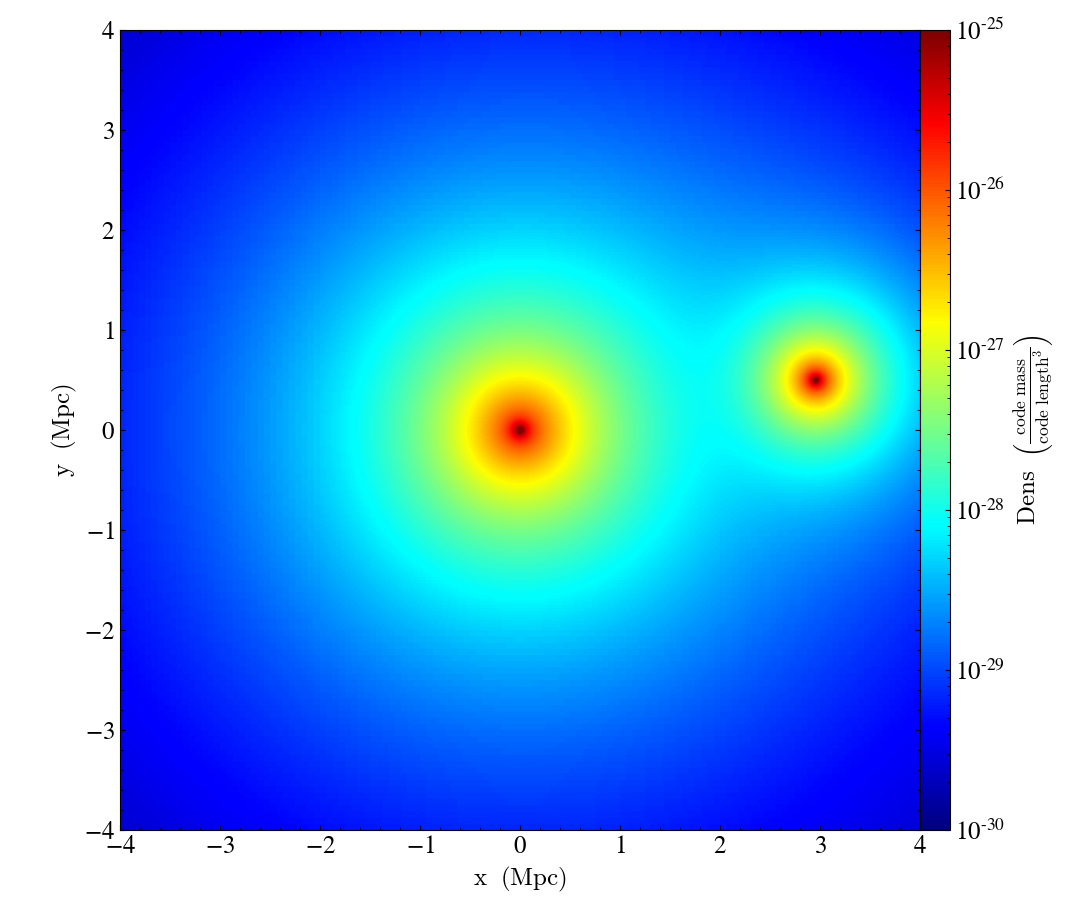

In [8]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','dens')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'dens')], 'Blue-Red')
p.set_zlim(('flash', 'dens'), 1e-30, 1e-25)
p.show()

yt : [INFO     ] 2022-12-21 13:53:32,136 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:53:32,138 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:53:32,142 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:53:32,143 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:53:32,148 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



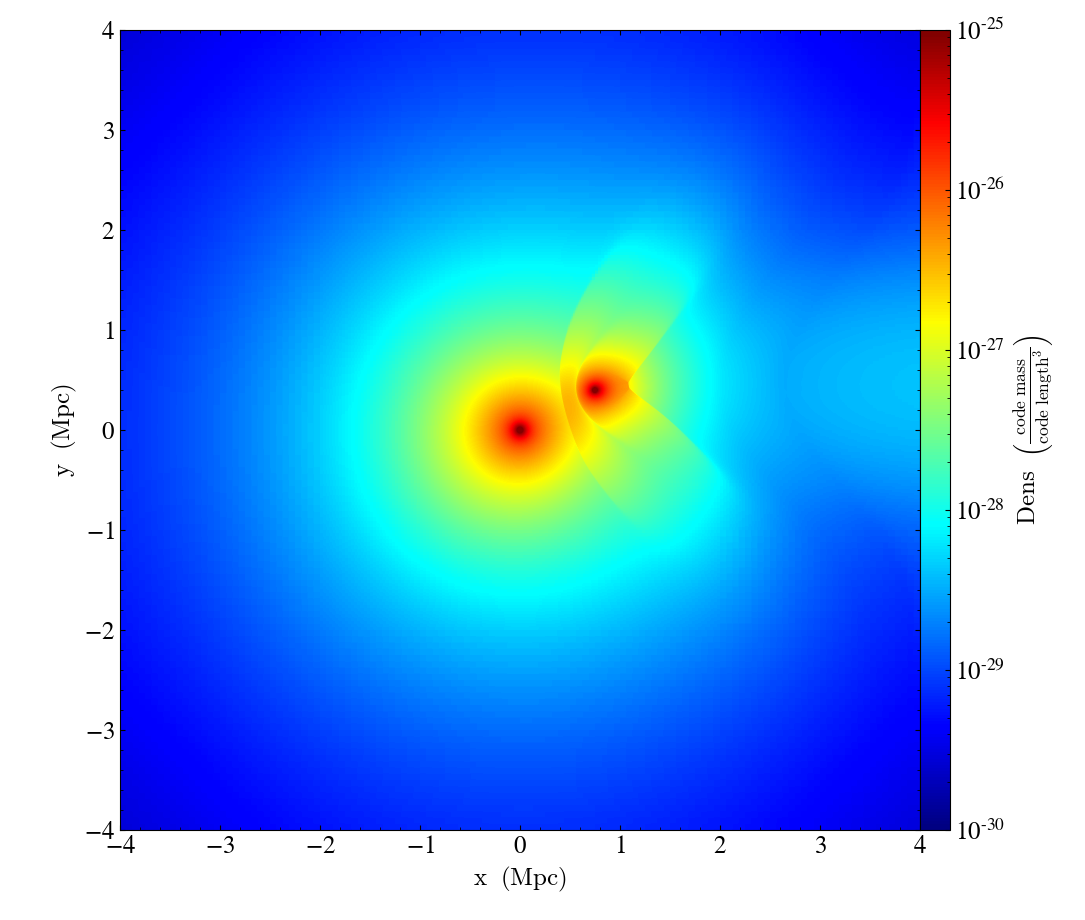

In [7]:
# 300
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','dens')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'dens')], 'Blue-Red')
p.set_zlim(('flash', 'dens'), 1e-30, 1e-25)
p.show()

### Pressure

yt : [INFO     ] 2022-12-20 16:03:45,729 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:45,731 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:45,732 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:45,733 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:45,735 Making a fixed resolution buffer of (('flash', 'pres')) 800 by 800



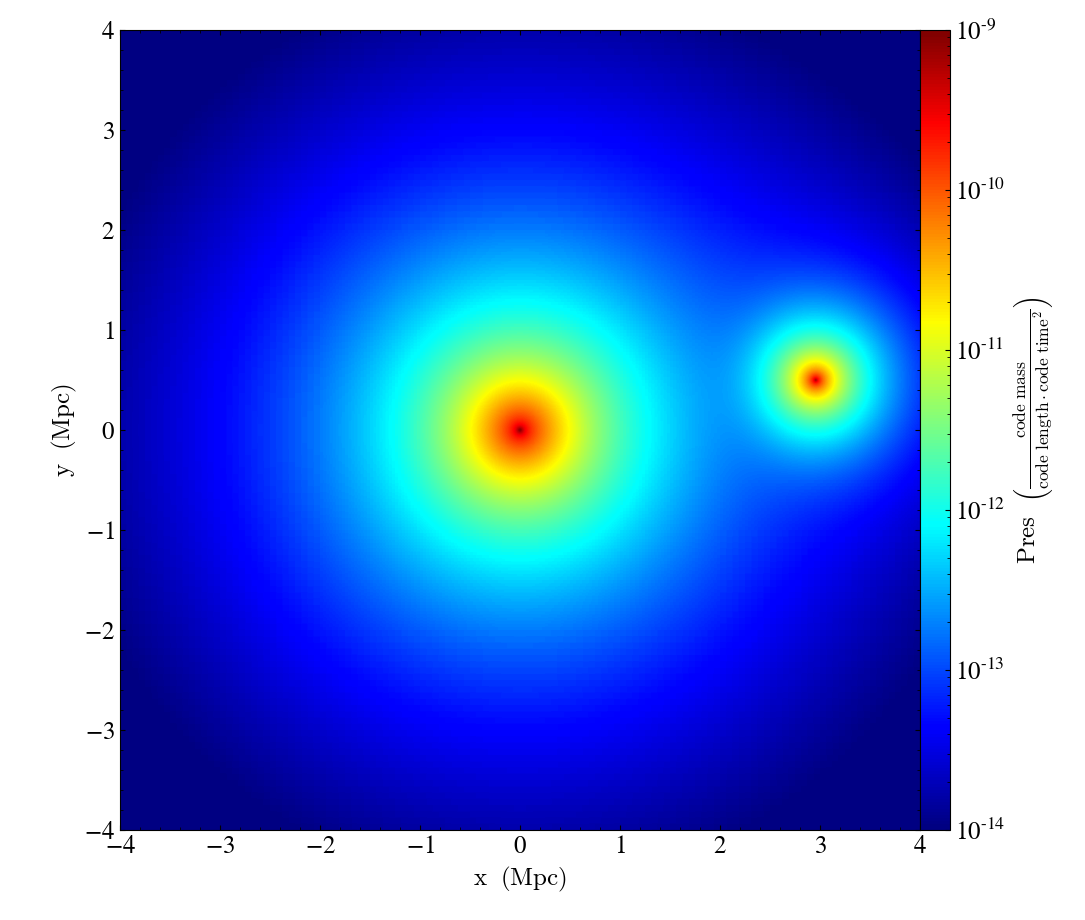

In [9]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','pres')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'pres')], 'Blue-Red')
p.set_zlim(('flash', 'pres'), 1e-14, 1e-9)
p.show()

yt : [INFO     ] 2022-12-21 13:54:06,651 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:54:06,654 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:54:06,657 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:54:06,658 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:54:06,663 Making a fixed resolution buffer of (('flash', 'pres')) 800 by 800



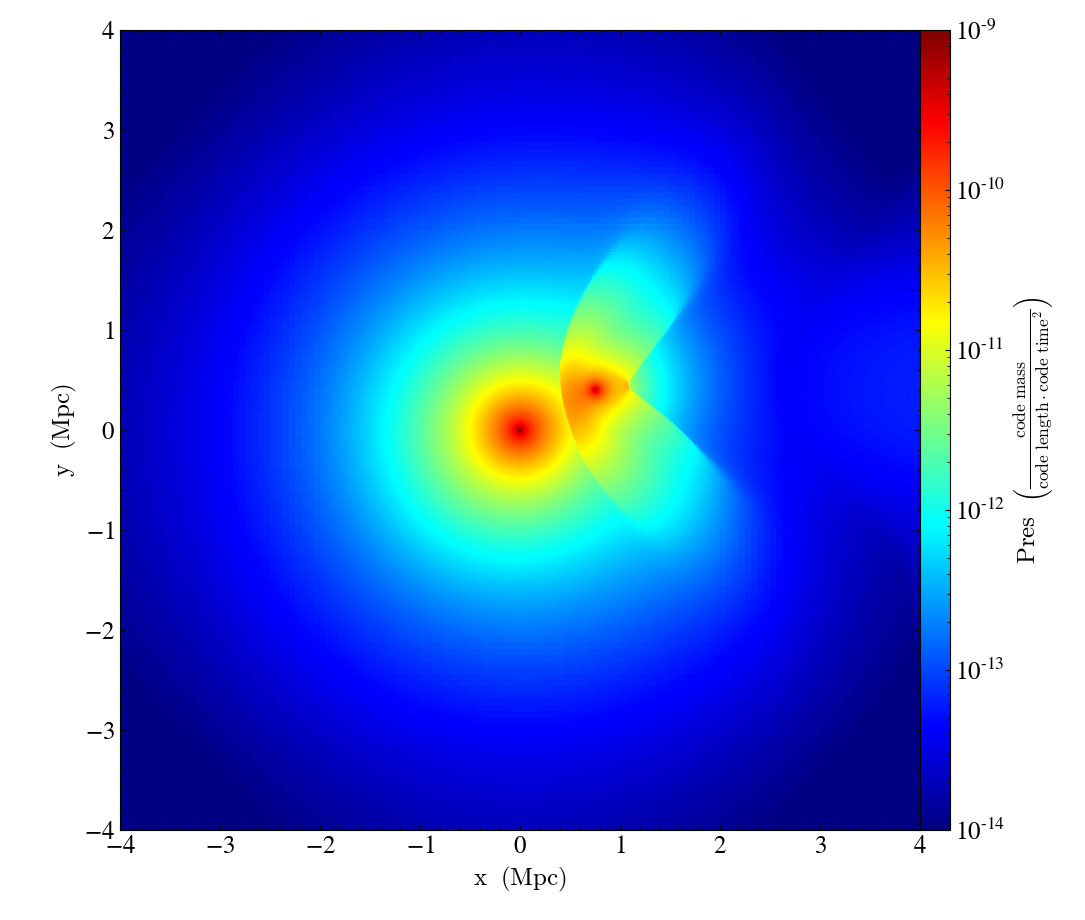

In [8]:
# 300
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','pres')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'pres')], 'Blue-Red')
p.set_zlim(('flash', 'pres'), 1e-14, 1e-9)
p.show()

### Gravatational Potential

yt : [INFO     ] 2022-12-20 16:03:59,445 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,446 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,448 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,449 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-20 16:03:59,452 Making a fixed resolution buffer of (('flash', 'gpot')) 800 by 800
yt : [WARNING  ] 2022-12-20 16:03:59,672 Plotting ('flash', 'gpot'): All negative values. Max = -9299429733034056.0 code_length**2/code_time**2.
yt : [WARNING  ] 2022-12-20 16:03:59,674 Switching to symlog colorbar scaling.



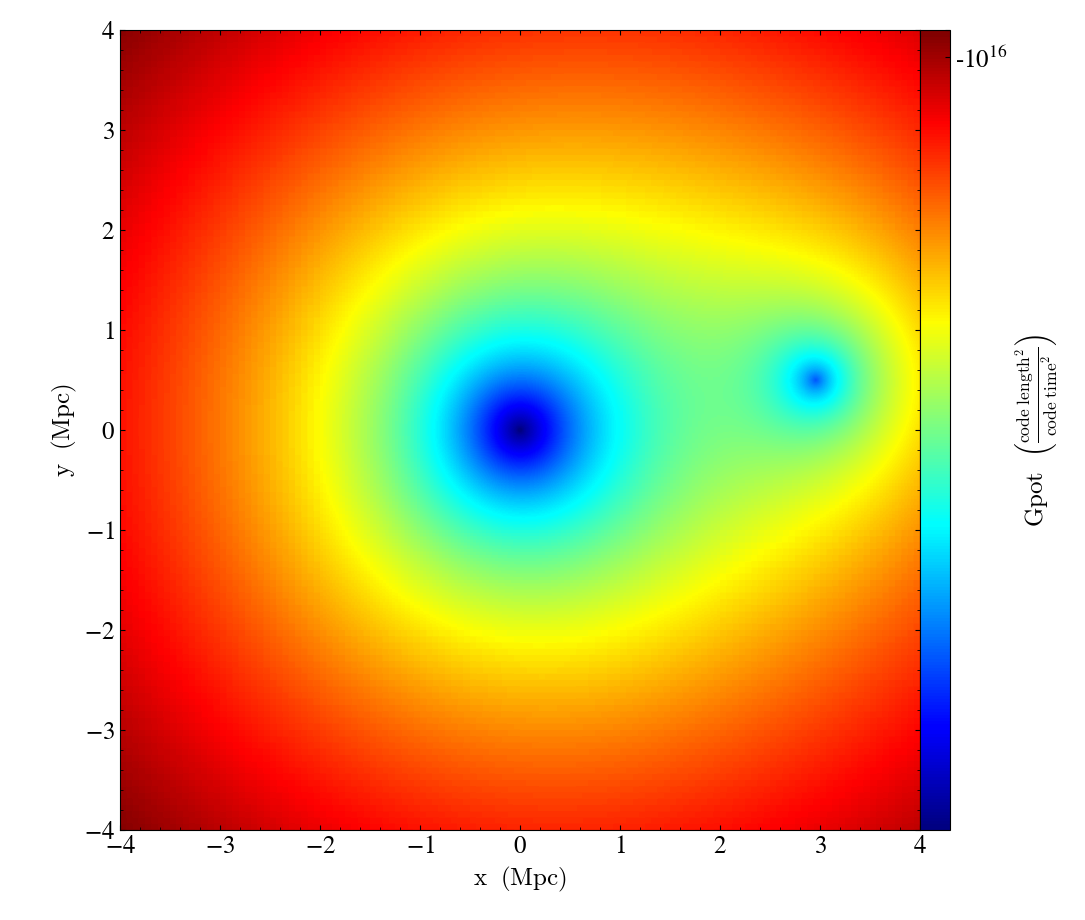

In [10]:
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','gpot')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'gpot')], 'Blue-Red')
# p.set_zlim(('flash', 'gpot'), -1e-16, -6e-16)
p.show()

yt : [INFO     ] 2022-12-21 13:55:00,861 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:55:00,863 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:55:00,866 xlim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:55:00,867 ylim = -12342710323849299255885824.000000 12342710323849299255885824.000000
yt : [INFO     ] 2022-12-21 13:55:00,872 Making a fixed resolution buffer of (('flash', 'gpot')) 800 by 800
yt : [WARNING  ] 2022-12-21 13:55:01,227 Plotting ('flash', 'gpot'): All negative values. Max = -9681804197705070.0 code_length**2/code_time**2.
yt : [WARNING  ] 2022-12-21 13:55:01,229 Switching to symlog colorbar scaling.



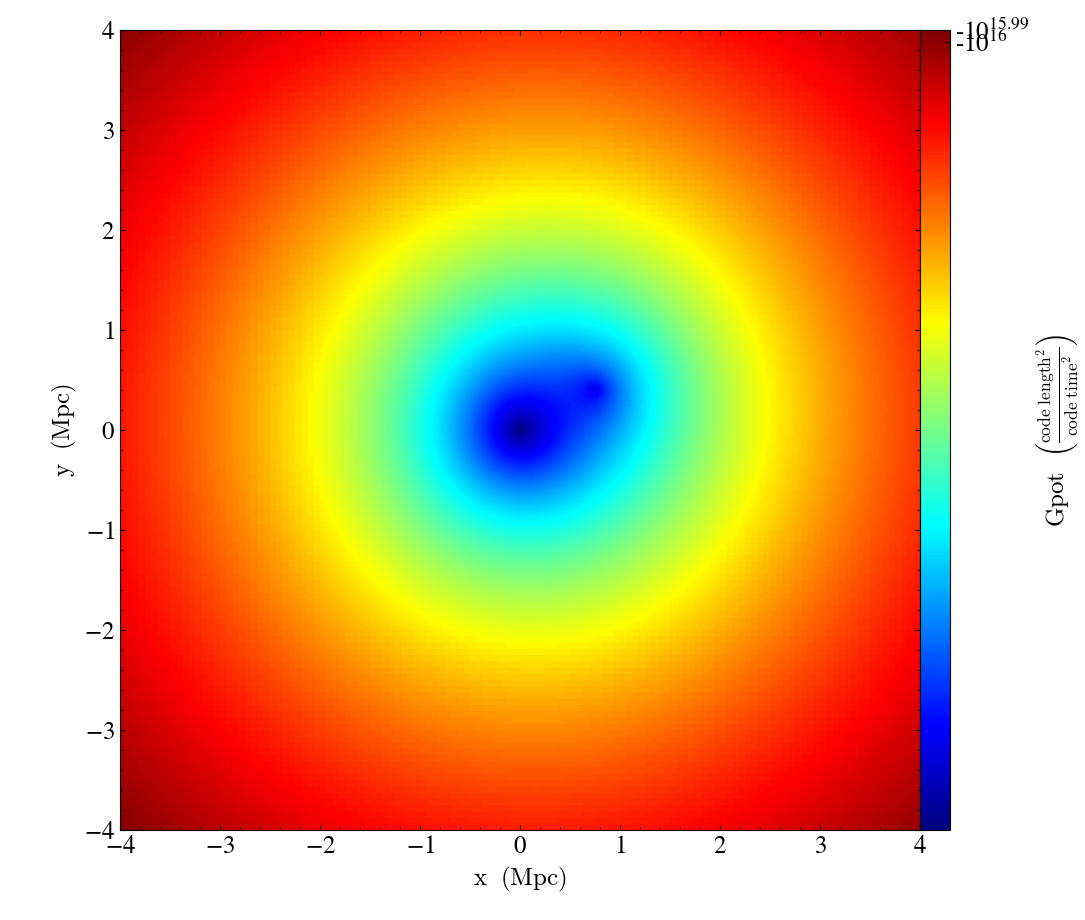

In [9]:
# 300
p = yt.SlicePlot(
    ds, 
    'z', 
    [('flash','gpot')],
    width = (8, 'Mpc')
)
p.set_cmap([('flash', 'gpot')], 'Blue-Red')
# p.set_zlim(('flash', 'gpot'), -1e-16, -6e-16)
p.show()